In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import functions as func

#Loading files 
path_HD185859="./data/ascii/HD185859"
path_HD147889="./data/ascii/HD147889"
path_HD170740="./data/ascii/HD170740"
path_HD158926="./data/ascii/HD158926"
path_dibs="./data/dibs"

wavelength_HD18,spectrum_HD18=func.fileloader(path_HD185859)
wavelength_HD14,spectrum_HD14=func.fileloader(path_HD147889)
wavelength_HD17,spectrum_HD17=func.fileloader(path_HD170740)
# wavelength_HD15,spectrum_HD15=func.fileloader(path_HD158926)
wavelength_dibs,spectrum_dibs=func.fileloader(path_dibs)

# Normalize and standardize data
# spectrum_HD18=func.NormalizeData(spectrum_HD18)
# spectrum_HD14=func.NormalizeData(spectrum_HD14)
# spectrum_HD17=func.NormalizeData(spectrum_HD17)
spectrum_HD18=func.remove_continuum(spectrum_HD18)
spectrum_HD14=func.remove_continuum(spectrum_HD14)
spectrum_HD17=func.remove_continuum(spectrum_HD17)
# spectrum_HD15=func.NormalizeData(spectrum_HD15)

FileNotFoundError: [Errno 2] No such file or directory: './data/ascii/HD185859'

/home/joost/Dev/Universiteit/brp/functions.py:234: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


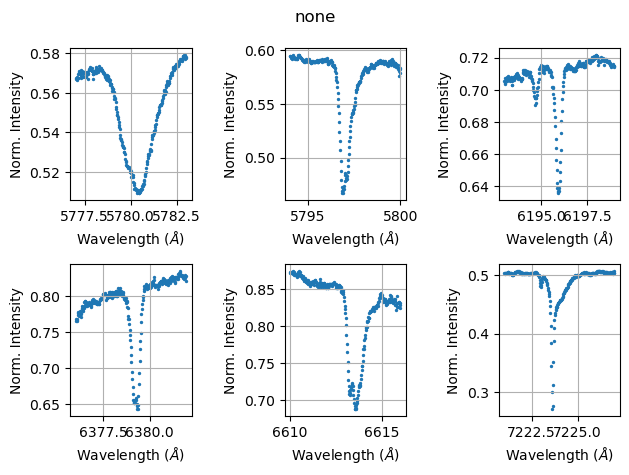

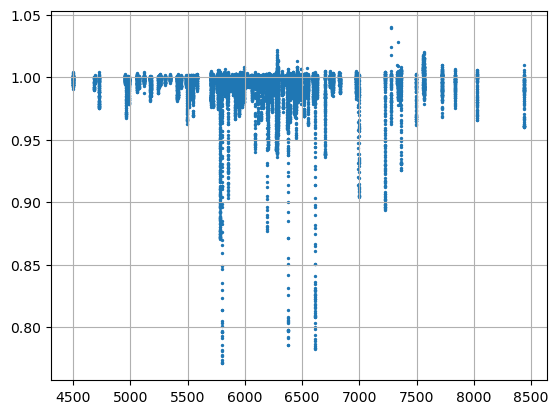

In [2]:
dib_wavelengths_HD18=[]
dib_spectra_HD18=[]
dib_centra_list=[5780,5797,6196,6379,6613,7224]
dib_wavelengths_HD18,dib_spectra_HD18=func.dib_finder(wavelength_HD18,spectrum_HD18,dib_centra_list,wave_range=3)
func.quickplot(dib_wavelengths_HD18,dib_spectra_HD18,cols=3)
# Now Find ALL DIBs
plt.figure()
plt.scatter(wavelength_dibs,spectrum_dibs,s=2)
plt.grid()
plt.show()
# Find dib locs
dib_wavelengths,dib_spectra,dib_locs=func.dib_finder(wavelength_dibs,spectrum_dibs,locs=dib_centra_list,wave_range=3,threshold=0.03)

In [3]:
# Now look for them in the other stars spectrum
# make the fits
# Now calculate the full width half maximum

# Now do it quickly for the other targets
dib_wavelengths_HD14,dib_spectra_HD14,centra_list_HD14=func.dib_finder(wavelength_HD14,spectrum_HD14,locs=dib_locs,wave_range=5,index_search=True,ref_wavelengths=wavelength_dibs)
dib_wavelengths_HD17,dib_spectra_HD17,centra_list_HD17=func.dib_finder(wavelength_HD17,spectrum_HD17,locs=dib_locs,wave_range=5,index_search=True,ref_wavelengths=wavelength_dibs)
dib_wavelengths_HD18,dib_spectra_HD18,centra_list_HD18=func.dib_finder(wavelength_HD18,spectrum_HD18,locs=dib_locs,wave_range=5,index_search=True,ref_wavelengths=wavelength_dibs)
for i in range(len(dib_wavelengths_HD14)):
    dib_spectra_HD14[i]=func.detrender(dib_wavelengths_HD14[i],dib_spectra_HD14[i])
for i in range(len(dib_wavelengths_HD17)):
    dib_spectra_HD17[i]=func.detrender(dib_wavelengths_HD17[i],dib_spectra_HD17[i])
for i in range(len(dib_wavelengths_HD18)):
    dib_spectra_HD18[i]=func.detrender(dib_wavelengths_HD18[i],dib_spectra_HD18[i])

In [6]:
def fit_dibs(dib_wvls, dib_spectra, model = func.skewed_gauss):
    assert len(dib_wvls) == len(dib_spectra), f'len(dib_wvls)={len(dib_wvls)} and len(dib_spectra)={len(dib_spectra)}, but they must have the same length'

    bounds_list = []
    p0_list = []
    centra_list = []

    for dib_wvl, dib_spectrum in zip(dib_wvls, dib_spectra):
        dib_center = func.min_finder(dib_wvl, dib_spectrum)

        centra_list.append(dib_center)
        p0_list.append([dib_center,0.1,0.10,2])
        bounds_list.append(np.array((
            [dib_center-0.5,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],
            [dib_center+0.5, np.inf, np.inf, np.inf, np.inf, np.inf]
        )))

    return func.fitter_plotter(dib_wvls, dib_spectra, model, centra_list, p0_list=p0_list, bounds_list=bounds_list)


param_list_HD14, prediction_list_HD14 = fit_dibs(dib_wavelengths_HD14, dib_spectra_HD14)
param_list_HD17, prediction_list_HD17 = fit_dibs(dib_wavelengths_HD17, dib_spectra_HD17)
param_list_HD18, prediction_list_HD18 = fit_dibs(dib_wavelengths_HD18, dib_spectra_HD18)

fwhm_list_HD14 = [func.FWHM(params[1]) for params in param_list_HD14]
fwhm_list_HD17 = [func.FWHM(params[1]) for params in param_list_HD17]
fwhm_list_HD18 = [func.FWHM(params[1]) for params in param_list_HD18]

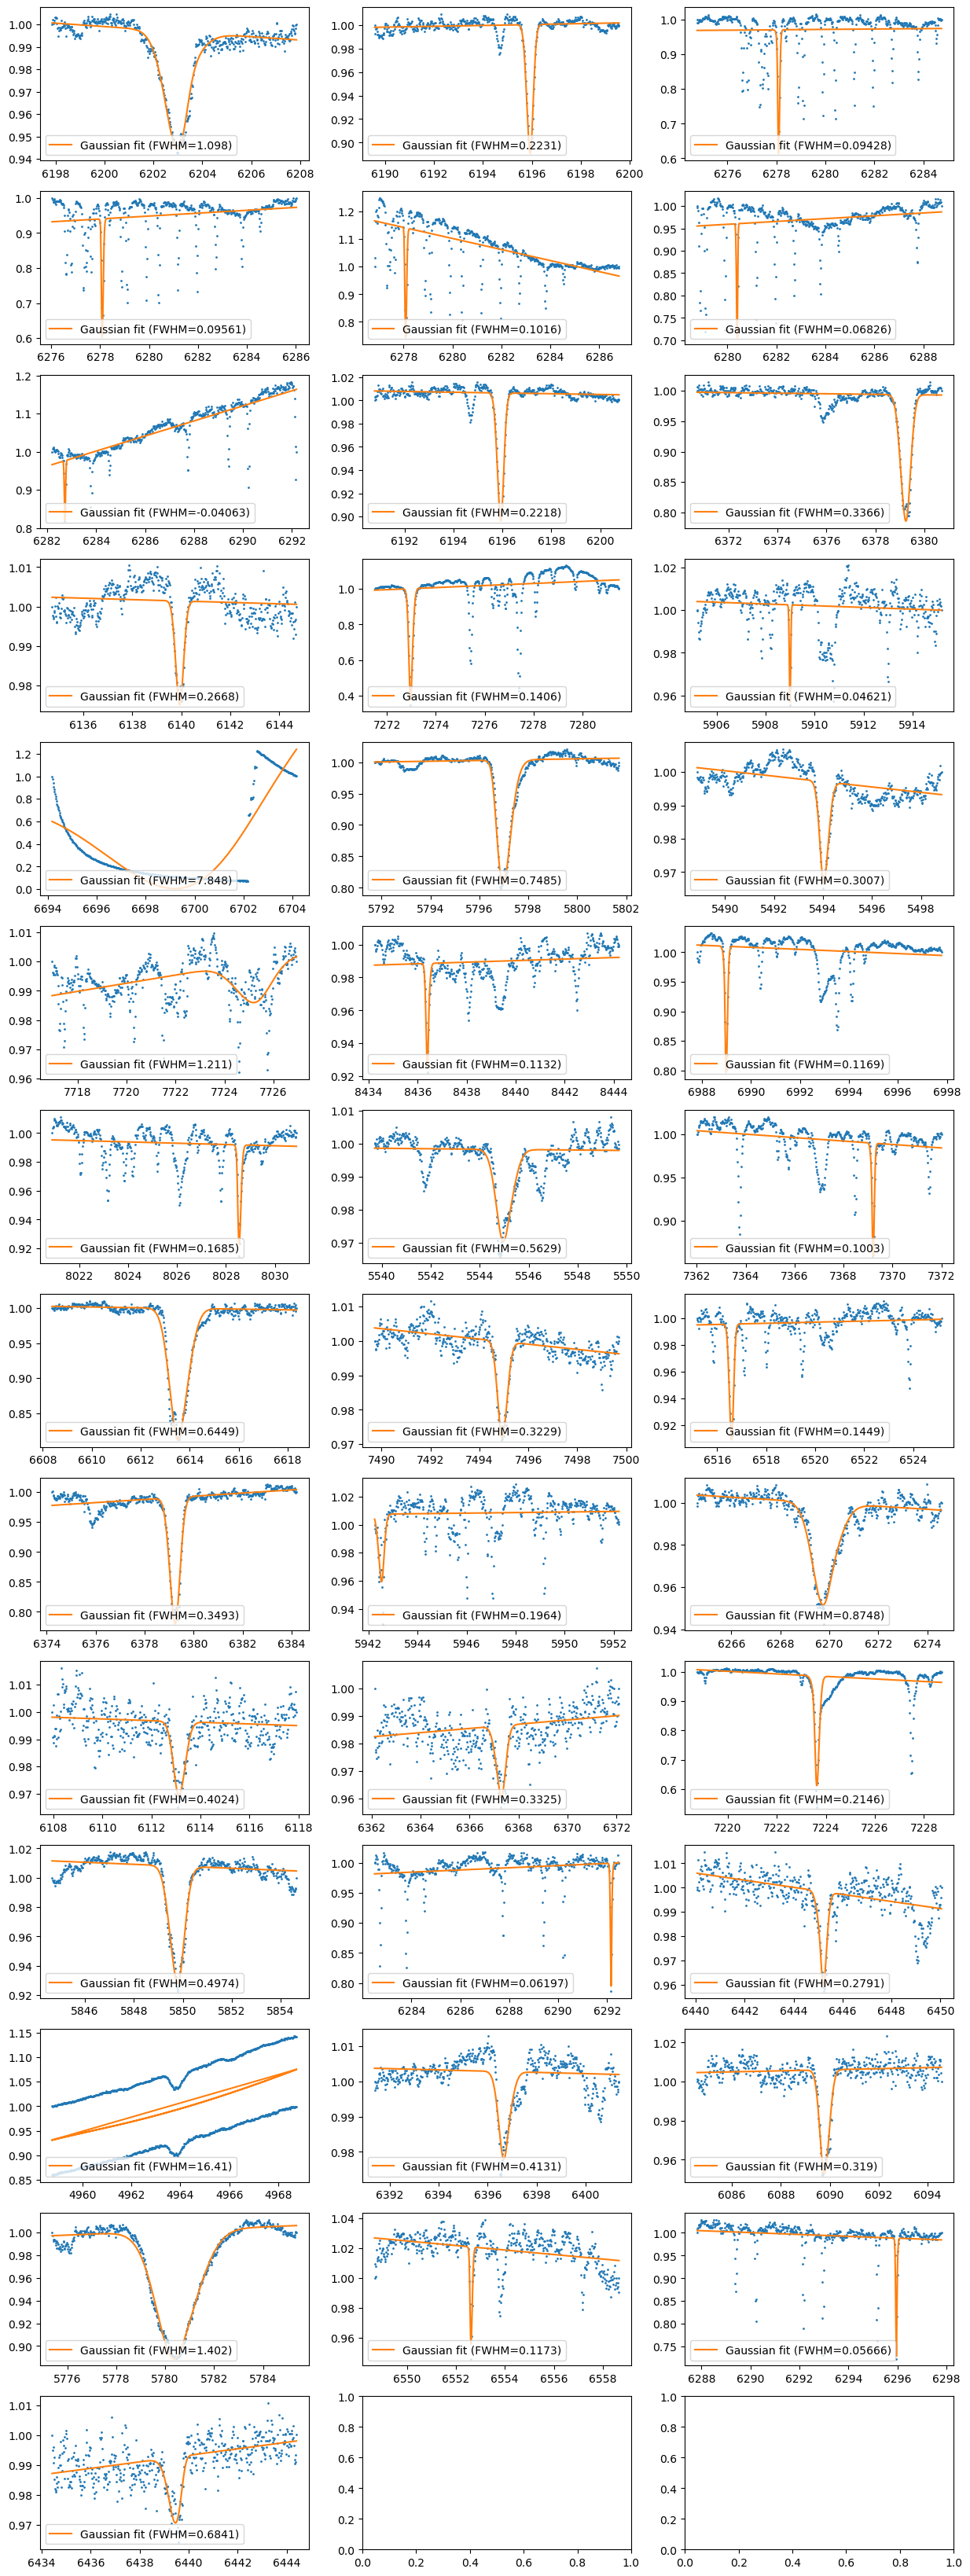

In [7]:
ncols = 3
nrows = int(np.ceil(len(dib_wavelengths_HD18) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

for wvl, flux, fit, ax, fwhm in zip(dib_wavelengths_HD18, dib_spectra_HD18, prediction_list_HD18, [ax for axs in axes for ax in axs], fwhm_list_HD18):
    ax.plot(wvl, flux, '.', ms=2)
    ax.plot(wvl, fit, label=f'Gaussian fit (FWHM={fwhm:.4g})')
    ax.legend(loc='lower left')